In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
from sklearn.linear_model import LinearRegression #Función regresión lineal

In [13]:
#Carga de archivo CSV
df = pd.read_csv('Mexico_Limpio.csv')
df.shape

(26401, 47)

In [14]:
#Verificamos los tipos de cuartos  y sus datos 
df['room_type'].value_counts()

room_type
Entire home/apt    17235
Private room        8867
Shared room          208
Hotel room            91
Name: count, dtype: int64

In [15]:
#Creamos los df por tipos de habitación 
df1 = df[df['room_type'] == 'Entire home/apt']
df2 = df[df['room_type'] == 'Private room']
df3 = df[df['room_type'] == 'Shared room']
df4 = df[df['room_type'] == 'Hotel room']

In [ ]:
#Creamos la matriz de correlación para cada tipo de cuarto
Corr_df1 = df1.corr(numeric_only=True).abs()
Corr_df2 = df2.corr(numeric_only=True).abs()
Corr_df3 = df3.corr(numeric_only=True).abs()        
Corr_df4 = df4.corr(numeric_only=True).abs()

REGRESIÓN SIMPLE 

Primer bloque 'host_acceptance_rate' (dependiente) vs 'host_response_rate' (independiente)

In [ ]:
b1 = {
    "Entire_home_apt": df1['host_acceptance_rate'].corr(df1['host_response_rate']),
    "Private_room": df2['host_acceptance_rate'].corr(df2['host_response_rate']),
    "Shared_room": df3['host_acceptance_rate'].corr(df3['host_response_rate']),
    "Hotel_room": df4['host_acceptance_rate'].corr(df4['host_response_rate'])
}

tabla_corr = pd.DataFrame.from_dict(b1, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.510470
Private_room        0.473699
Shared_room         0.248356
Hotel_room         -0.066257


Segundo bloque 'host_acceptance_rate' (dependiente) vs 'price' (independiente)

In [18]:
b2 = {
    "Entire_home_apt": df1['host_acceptance_rate'].corr(df1['price']),
    "Private_room": df2['host_acceptance_rate'].corr(df2['price']),
    "Shared_room": df3['host_acceptance_rate'].corr(df3['price']),
    "Hotel_room": df4['host_acceptance_rate'].corr(df4['price'])
}

tabla_corr = pd.DataFrame.from_dict(b2, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.003588
Private_room        0.046523
Shared_room        -0.095747
Hotel_room         -0.201461


Tercer bloque 'host_acceptance_rate' (dependiente) vs 'number_of_reviews' (independiente)

In [19]:
b3 = {
    "Entire_home_apt": df1['host_acceptance_rate'].corr(df1['number_of_reviews']),
    "Private_room": df2['host_acceptance_rate'].corr(df2['number_of_reviews']),
    "Shared_room": df3['host_acceptance_rate'].corr(df3['number_of_reviews']),
    "Hotel_room": df4['host_acceptance_rate'].corr(df4['number_of_reviews'])
}

tabla_corr = pd.DataFrame.from_dict(b3, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.272848
Private_room        0.288015
Shared_room         0.145813
Hotel_room          0.283975


Cuarto bloque 'review_scores_rating' (dependiente) vs 'host_listings_count' (independiente)

In [20]:
b4 = {
    "Entire_home_apt": df1['review_scores_rating'].corr(df1['host_listings_count']),
    "Private_room": df2['review_scores_rating'].corr(df2['host_listings_count']),
    "Shared_room": df3['review_scores_rating'].corr(df3['host_listings_count']),
    "Hotel_room": df4['review_scores_rating'].corr(df4['host_listings_count'])
}

tabla_corr = pd.DataFrame.from_dict(b4, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.165132
Private_room       -0.177551
Shared_room        -0.110748
Hotel_room         -0.128400


Quinto bloque 'availability_365' (dependiente) vs 'number_of_reviews' (independiente)

In [21]:
b5 = {
    "Entire_home_apt": df1['availability_365'].corr(df1['number_of_reviews']),
    "Private_room": df2['availability_365'].corr(df2['number_of_reviews']),
    "Shared_room": df3['availability_365'].corr(df3['number_of_reviews']),
    "Hotel_room": df4['availability_365'].corr(df4['number_of_reviews'])
}

tabla_corr = pd.DataFrame.from_dict(b5, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.030455
Private_room        0.078691
Shared_room        -0.276989
Hotel_room          0.137305


Sexto bloque 'reviews_per_month' (dependiente) vs 'review_scores_communication' (independiente)

In [22]:
b6 = {
    "Entire_home_apt": df1['reviews_per_month'].corr(df1['review_scores_communication']),
    "Private_room": df2['reviews_per_month'].corr(df2['review_scores_communication']),
    "Shared_room": df3['reviews_per_month'].corr(df3['review_scores_communication']),
    "Hotel_room": df4['reviews_per_month'].corr(df4['review_scores_communication'])
}

tabla_corr = pd.DataFrame.from_dict(b6, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.038515
Private_room       -0.051698
Shared_room        -0.024450
Hotel_room         -0.019704


Tablas de correlación  para cada tipo de alojamiento

In [23]:
subsets = {"Entire_home_apt": df1, "Private_room": df2, "Shared_room": df3, "Hotel_room": df4}

def top10_corr(df):
    # Solo columnas numéricas
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1","Variable_2","Abs_Correlación"])
    
    corr = num.corr(method="pearson")
    corr_abs = corr.abs()

    # Eliminar duplicados (triángulo superior + diagonal)
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))
    corr_pairs = corr_abs.mask(mask).stack().sort_values(ascending=False)

    # Tomar las 10 más altas
    top10 = corr_pairs.head(20).reset_index()
    top10.columns = ["Variable_1", "Variable_2", "Abs_Correlación"]
    return top10

# Mostrar las tablas para cada subset
top10_dict = {}
for name, sub in subsets.items():
    print("\n" + "="*80)
    print(f"Top 10 correlaciones absolutas - {name}")
    print("="*80)
    top10 = top10_corr(sub)
    top10_dict[name] = top10
    display(top10)


Top 10 correlaciones absolutas - Entire_home_apt


,Variable_1,Variable_2,Abs_Correlación
0,host_total_listings_count,host_listings_count,0.978710
1,maximum_nights_avg_ntm,maximum_maximum_nights,0.976836
2,maximum_nights_avg_ntm,minimum_maximum_nights,0.974444
3,availability_90,availability_60,0.967741
4,maximum_maximum_nights,minimum_maximum_nights,0.953913
5,calculated_host_listings_count_entire_homes,calculated_host_listings_count,0.951336
6,estimated_occupancy_l365d,number_of_reviews_ltm,0.943667
7,availability_60,availability_30,0.918097
8,calculated_host_listings_count,host_listings_count,0.912819
9,minimum_minimum_nights,minimum_nights,0.910111



Top 10 correlaciones absolutas - Private_room


,Variable_1,Variable_2,Abs_Correlación
0,maximum_nights_avg_ntm,minimum_maximum_nights,0.982387
1,availability_90,availability_60,0.979783
2,host_total_listings_count,host_listings_count,0.975636
3,maximum_nights_avg_ntm,maximum_maximum_nights,0.970464
4,minimum_nights_avg_ntm,maximum_minimum_nights,0.968337
5,estimated_occupancy_l365d,number_of_reviews_ltm,0.966959
6,minimum_minimum_nights,minimum_nights,0.966870
7,availability_60,availability_30,0.947855
8,maximum_maximum_nights,minimum_maximum_nights,0.942139
9,minimum_nights_avg_ntm,minimum_nights,0.908876



Top 10 correlaciones absolutas - Shared_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_minimum_nights,minimum_nights,1.000000
1,minimum_nights_avg_ntm,minimum_nights,0.995303
2,minimum_nights_avg_ntm,minimum_minimum_nights,0.995303
3,estimated_occupancy_l365d,number_of_reviews_ltm,0.985130
4,minimum_nights_avg_ntm,maximum_minimum_nights,0.983866
5,maximum_minimum_nights,minimum_nights,0.976125
6,maximum_minimum_nights,minimum_minimum_nights,0.976125
7,availability_90,availability_60,0.972604
8,calculated_host_listings_count,host_listings_count,0.971535
9,availability_60,availability_30,0.931289



Top 10 correlaciones absolutas - Hotel_room


,Variable_1,Variable_2,Abs_Correlación
0,estimated_occupancy_l365d,number_of_reviews_ltm,1.000000
1,minimum_nights_avg_ntm,maximum_minimum_nights,0.991695
2,availability_90,availability_60,0.983763
3,host_total_listings_count,host_listings_count,0.982898
4,minimum_minimum_nights,minimum_nights,0.978536
5,availability_eoy,availability_90,0.968035
6,number_of_reviews_ly,number_of_reviews_ltm,0.960736
7,estimated_occupancy_l365d,number_of_reviews_ly,0.960736
8,availability_60,availability_30,0.949445
9,maximum_nights_avg_ntm,maximum_maximum_nights,0.933532


Gráficamos con el mapa de color los coeficientes de corelación - HEATMAP

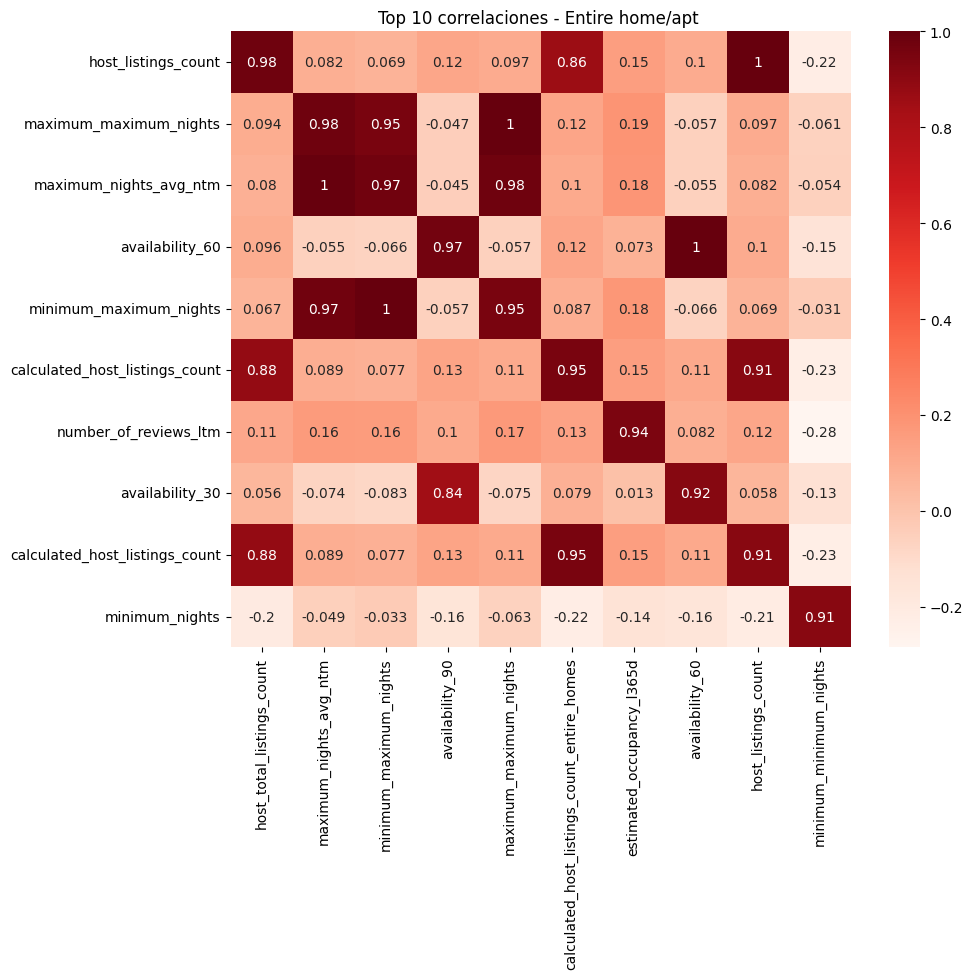

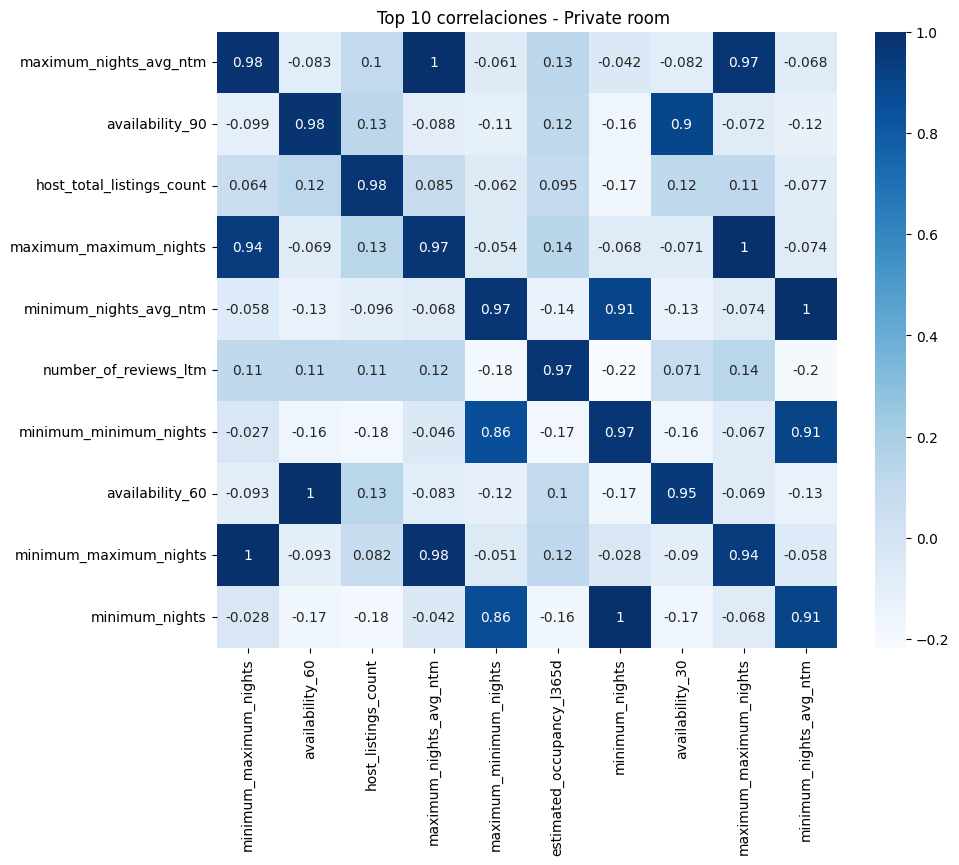

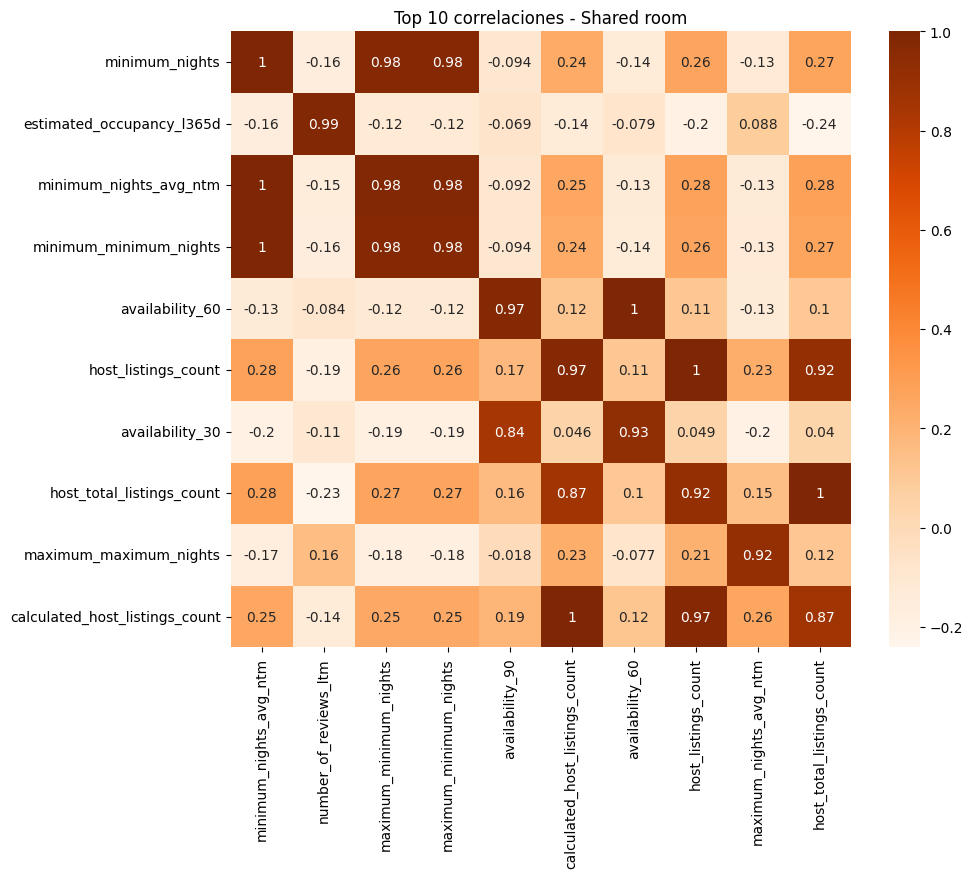

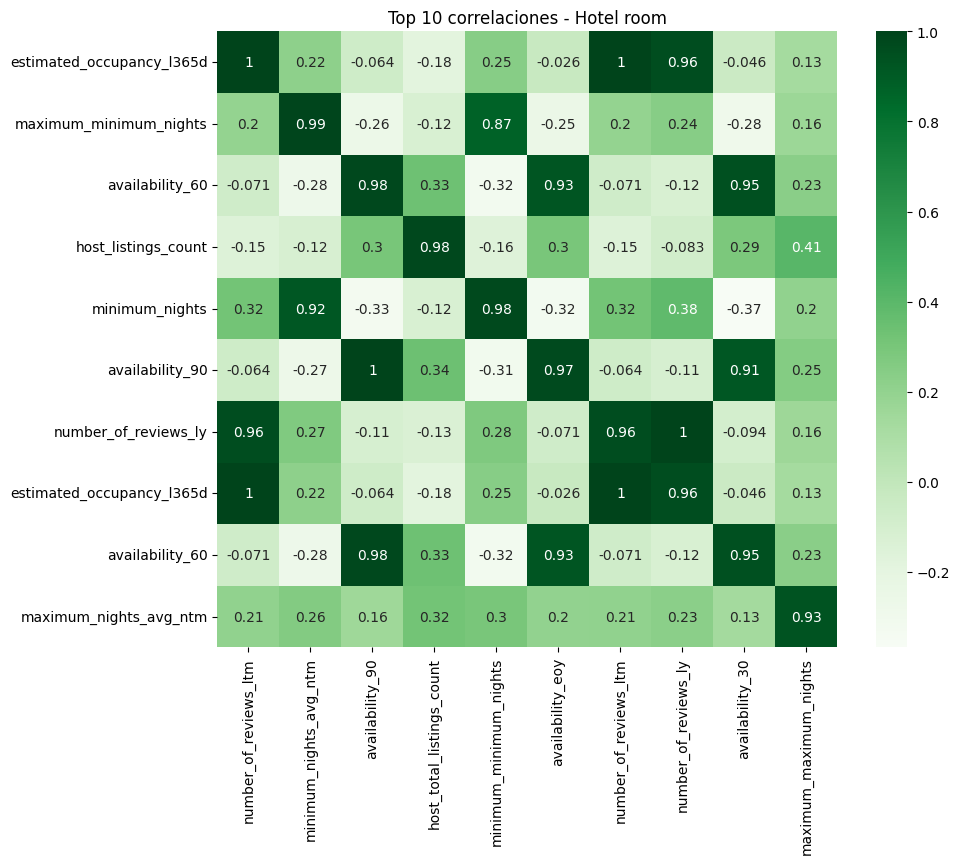

In [36]:
for i, subset in enumerate([df1], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="Reds")
    plt.title(f"Top 10 correlaciones - Entire home/apt ")
    plt.show()

for i, subset in enumerate([df2], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="Blues")
    plt.title(f"Top 10 correlaciones - Private room ")
    plt.show()


for i, subset in enumerate([df3], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="Oranges")
    plt.title(f"Top 10 correlaciones - Shared room")
    plt.show()


for i, subset in enumerate([df4], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="Greens")
    plt.title(f"Top 10 correlaciones - Hotel room")
    plt.show()

REGRESIÓN MULTIPLE

In [65]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

Modelo 1 para variable cuantitativa 'review_scores_rating'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['review_scores_rating']).sort_values(ascending=False)
print(corr_review.head(10))

review_scores_rating           1.000000
review_scores_value            0.808317
review_scores_accuracy         0.803732
review_scores_cleanliness      0.729123
review_scores_communication    0.705329
review_scores_checkin          0.650935
review_scores_location         0.457388
host_is_superhost              0.313676
estimated_revenue_l365d        0.110962
minimum_nights                 0.095996
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['review_scores_accuracy','review_scores_value','review_scores_cleanliness']]
Var_Dep = df['review_scores_rating']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.39552201 0.35995587 0.22410686]
Intercepto: 0.09667626012993846
Coeficiente de determinación: 0.7647048274755183
Coeficiente de correlación: 0.8744740290457563
Modelo matemático:
review_scores_rating = 0.0967 + 0.3955*review_scores_accuracy + 0.3600*review_scores_value + 0.2241*review_scores_cleanliness


Modelo 2 para variable cuantitativa 'host_acceptance_rate'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['host_acceptance_rate']).sort_values(ascending=False)
print(corr_review.head(10))

host_acceptance_rate         1.000000
host_response_rate           0.505040
estimated_occupancy_l365d    0.372542
number_of_reviews_ltm        0.356422
number_of_reviews_ly         0.318600
reviews_per_month            0.308640
estimated_revenue_l365d      0.308022
number_of_reviews_l30d       0.304725
host_is_superhost            0.297976
number_of_reviews            0.297743
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [42]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['host_response_rate','estimated_occupancy_l365d','number_of_reviews_ltm']]
Var_Dep = df['host_acceptance_rate']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [9.37062716e-01 2.08147623e-04 2.14429815e-04]
Intercepto: 0.00045569657620936344
Coeficiente de determinación: 0.308848982061813
Coeficiente de correlación: 0.5557418304049219
Modelo matemático:
host_acceptance_rate = 0.0005 + 0.9371*host_response_rate + 0.0002*estimated_occupancy_l365d + 0.0002*number_of_reviews_ltm


Modelo 3 para variable cuantitativa 'host_is_superhost'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['host_is_superhost']).sort_values(ascending=False)
print(corr_review.head(10))

host_is_superhost              1.000000
estimated_occupancy_l365d      0.368400
number_of_reviews_ltm          0.353186
number_of_reviews_ly           0.335640
review_scores_rating           0.313676
host_response_rate             0.307840
host_acceptance_rate           0.297976
number_of_reviews              0.293055
estimated_revenue_l365d        0.292597
review_scores_communication    0.291805
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [44]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['estimated_occupancy_l365d','number_of_reviews_ltm','review_scores_rating']]
Var_Dep = df['host_is_superhost']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [1.76106502e-03 3.21915064e-04 8.23423590e-01]
Intercepto: -3.7136308755904897
Coeficiente de determinación: 0.21935779497124597
Coeficiente de correlación: 0.4683564827898147
Modelo matemático:
host_is_superhost = -3.7136 + 0.0018*estimated_occupancy_l365d + 0.0003*number_of_reviews_ltm + 0.8234*review_scores_rating


Modelo 4 para variable cuantitativa ' host_total_listings_count'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['host_total_listings_count']).sort_values(ascending=False)
print(corr_review.head(10))

host_total_listings_count                       1.000000
host_listings_count                             0.977708
calculated_host_listings_count                  0.876623
calculated_host_listings_count_entire_homes     0.714653
calculated_host_listings_count_private_rooms    0.183498
estimated_revenue_l365d                         0.181982
latitude                                        0.181793
host_acceptance_rate                            0.180054
price                                           0.152239
availability_365                                0.144656
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [46]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['host_listings_count','calculated_host_listings_count','estimated_revenue_l365d']]
Var_Dep = df['host_total_listings_count']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [ 1.29159704e+00 -1.44398850e-01  6.89945355e-07]
Intercepto: 0.46090751882282355
Coeficiente de determinación: 0.9570472140223851
Coeficiente de correlación: 0.9782878993539607
Modelo matemático:
host_total_listings_count = 0.4609 + 1.2916*host_listings_count - 0.1444*calculated_host_listings_count + 0.0000*estimated_revenue_l365d


Modelo 5 para variable cuantitativa 'accommodates'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['accommodates']).sort_values(ascending=False)
print(corr_review.head(10))

accommodates                                   1.000000
beds                                           0.758204
bedrooms                                       0.749513
bathrooms                                      0.496300
price                                          0.472515
estimated_revenue_l365d                        0.344652
calculated_host_listings_count_entire_homes    0.233130
estimated_occupancy_l365d                      0.140387
number_of_reviews_ltm                          0.131950
number_of_reviews_ly                           0.129536
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [50]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['beds','bathrooms','price']]
Var_Dep = df['accommodates']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [1.25196038e+00 3.93756436e-01 2.74981699e-04]
Intercepto: 0.015286651661634565
Coeficiente de determinación: 0.6097153718276904
Coeficiente de correlación: 0.780842731814602
Modelo matemático:
accommodates = 0.0153 + 1.2520*beds + 0.3938*bathrooms + 0.0003*price


Modelo 6 para variable cuantitativa 'bedrooms'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['bedrooms']).sort_values(ascending=False)
print(corr_review.head(10))

bedrooms                                       1.000000
accommodates                                   0.749513
beds                                           0.703982
bathrooms                                      0.589054
price                                          0.487583
estimated_revenue_l365d                        0.284169
calculated_host_listings_count_entire_homes    0.119200
maximum_minimum_nights                         0.099381
minimum_nights                                 0.092182
minimum_nights_avg_ntm                         0.074789
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [57]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['accommodates','beds','bathrooms']]
Var_Dep = df['bedrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.19188547 0.21050502 0.3913659 ]
Intercepto: -0.021600530053165645
Coeficiente de determinación: 0.6488681954832065
Coeficiente de correlación: 0.8055235536489337
Modelo matemático:
bedrooms = -0.0216 + 0.1919*accommodates + 0.2105*beds + 0.3914*bathrooms


In [ ]:
#OPCIÓN B A UN NUEVO MODELO
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['maximum_minimum_nights','calculated_host_listings_count_entire_homes','estimated_revenue_l365d']]
Var_Dep = df['bedrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [4.11483519e-02 4.62580073e-03 1.78097225e-06]
Intercepto: 1.1693092806849066
Coeficiente de determinación: 0.08958932781304985
Coeficiente de correlación: 0.29931476377394056
Modelo matemático:
bedrooms = 1.1693 + 0.0411*maximum_minimum_nights + 0.0046*calculated_host_listings_count_entire_homes + 0.0000*estimated_revenue_l365d


Modelo 7 para variable cuantitativa 'price'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['price']).sort_values(ascending=False)
print(corr_review.head(10))

price                                          1.000000
bedrooms                                       0.487583
accommodates                                   0.472515
bathrooms                                      0.447674
beds                                           0.427997
estimated_revenue_l365d                        0.383225
calculated_host_listings_count_entire_homes    0.245449
review_scores_location                         0.157405
host_total_listings_count                      0.152239
host_listings_count                            0.141420
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [61]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['bedrooms','accommodates','bathrooms']]
Var_Dep = df['price']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [240.173292   117.93969527 451.55021736]
Intercepto: 65.25877847293737
Coeficiente de determinación: 0.2973705826679648
Coeficiente de correlación: 0.5453169561529926
Modelo matemático:
price = 65.2588 + 240.1733*bedrooms + 117.9397*accommodates + 451.5502*bathrooms


In [62]:
#OPCIÓN B DE PROPUESTA DE MODELO
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['estimated_revenue_l365d','calculated_host_listings_count_entire_homes','review_scores_location']]
Var_Dep = df['price']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [2.68482546e-03 2.51189565e+01 9.20254872e+02]
Intercepto: -3485.9316805005483
Coeficiente de determinación: 0.17992819476862454
Coeficiente de correlación: 0.4241794369940916
Modelo matemático:
price = -3485.9317 + 0.0027*estimated_revenue_l365d + 25.1190*calculated_host_listings_count_entire_homes + 920.2549*review_scores_location


Modelo 8 para variable cuantitativa 'review_scores_value'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['review_scores_value']).sort_values(ascending=False)
print(corr_review.head(10))

review_scores_value            1.000000
review_scores_rating           0.808317
review_scores_accuracy         0.758779
review_scores_cleanliness      0.664225
review_scores_communication    0.641744
review_scores_checkin          0.597623
review_scores_location         0.461125
host_is_superhost              0.260439
estimated_revenue_l365d        0.107704
number_of_reviews_l30d         0.107522
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [72]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness']]
Var_Dep = df['review_scores_value']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.54881658 0.34059284 0.10621987]
Intercepto: -0.025649364473370184
Coeficiente de determinación: 0.6915742196068843
Coeficiente de correlación: 0.831609415294755
Modelo matemático:
review_scores_value = -0.0256 + 0.5488*review_scores_rating + 0.3406*review_scores_accuracy + 0.1062*review_scores_cleanliness


Modelo 9 para variable cuantitativa 'bathrooms'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['bathrooms']).sort_values(ascending=False)
print(corr_review.head(10))

bathrooms                    1.000000
bedrooms                     0.589054
beds                         0.501286
accommodates                 0.496300
price                        0.447674
estimated_revenue_l365d      0.235807
maximum_minimum_nights       0.093877
host_total_listings_count    0.089035
host_listings_count          0.078369
minimum_nights               0.076778
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['bedrooms','beds','accommodates']]
Var_Dep = df['bathrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.28329255 0.08130646 0.01258629]
Intercepto: 0.7393308941631246
Coeficiente de determinación: 0.36254885948361504
Coeficiente de correlación: 0.602120303165086
Modelo matemático:
bathrooms = 0.7393 + 0.2833*bedrooms + 0.0813*beds + 0.0126*accommodates


In [ ]:
#OPCIÓN B DE MODELO 
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['price','estimated_revenue_l365d','maximum_minimum_nights']]
Var_Dep = df['bathrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Modelo 10 para variable cuantitativa 'reviews_per_month'

In [ ]:
# Correlación con todas variables numéricas
corr_review = df[num_cols].corrwith(df['reviews_per_month']).sort_values(ascending=False)
print(corr_review.head(10))

reviews_per_month            1.000000
number_of_reviews_ltm        0.802304
estimated_occupancy_l365d    0.742481
number_of_reviews_ly         0.699449
number_of_reviews_l30d       0.646572
number_of_reviews            0.590251
estimated_revenue_l365d      0.550380
host_acceptance_rate         0.308640
host_is_superhost            0.233267
host_response_rate           0.220633
dtype: float64


c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\vbece\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [80]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['number_of_reviews_ltm','estimated_occupancy_l365d','number_of_reviews_ly']]
Var_Dep = df['reviews_per_month']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [ 0.08832789 -0.00327108 -0.0115561 ]
Intercepto: 0.8129356640349106
Coeficiente de determinación: 0.6519188724411178
Coeficiente de correlación: 0.8074149320152048
Modelo matemático:
reviews_per_month = 0.8129 + 0.0883*number_of_reviews_ltm - 0.0033*estimated_occupancy_l365d - 0.0116*number_of_reviews_ly
